In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy as cp
from collections import Counter
import itertools
import time

'''
This notebook creates a bag of words matrix for ingredients for each recipe
'''
# Load full essay data
df = pd.read_json('train.json')
df.tail()

,cuisine,id,ingredients
39769,irish,29109,"[light brown sugar, granulated sugar, butter, ..."
39770,italian,11462,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,irish,2238,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,chinese,41882,"[boneless chicken skinless thigh, minced garli..."
39773,mexican,2362,"[green chile, jalapeno chilies, onions, ground..."


In [31]:
'''
Get unique ingredients (to be used for BoW)
'''
rows = len(df)
ingred_all = []
for r in range(rows):
    #print(df['ingredients'][r])
    #print(df['cuisine'][r])
    ingred_all.append(df['ingredients'][r])

ingred_all_flat = list(itertools.chain(*ingred_all))
unique_ingred = list(set(ingred_all_flat))
unique_ingred.sort()
print(unique_ingred)

['(    oz.) tomato sauce', '(   oz.) tomato paste', '(10 oz.) frozen chopped spinach', '(10 oz.) frozen chopped spinach, thawed and squeezed dry', '(14 oz.) sweetened condensed milk', '(14.5 oz.) diced tomatoes', '(15 oz.) refried beans', '1% low-fat buttermilk', '1% low-fat chocolate milk', '1% low-fat cottage cheese', '1% low-fat milk', '2 1/2 to 3 lb. chicken, cut into serving pieces', '2% low fat cheddar chees', '2% low-fat cottage cheese', '2% lowfat greek yogurt', '2% milk shredded mozzarella cheese', '2% reduced-fat milk', '25% less sodium chicken broth', '33% less sodium cooked deli ham', '33% less sodium cooked ham', '33% less sodium ham', '33% less sodium smoked fully cooked ham', '40% less sodium taco seasoning', '40% less sodium taco seasoning mix', '7 Up', '8 ounc ziti pasta, cook and drain', '95% lean ground beef', 'A Taste of Thai Rice Noodles', 'Accent Seasoning', 'Adobo All Purpose Seasoning', 'Alaskan king crab legs', 'Alexia Waffle Fries', 'Alfredo sauce', 'Amarena c

In [33]:
'''
Create BoW Functions

'''

def createBow(df, colName, topWords, outFileName, saveCSV=1):
    '''
    Inputs: dataframe, column name, top words used for bow, output file name
    
    For a particular column, creates a bag of words matrix with the topWords input
    
    '''
    # Create a 0 matrix where the column headings are the top words
    bow = pd.DataFrame(np.zeros((len(df),len(topWords))), columns = topWords)
    
    # For each answer in essay5, get the bag of words representation for that row
    start_time = time.time()
    
    for ind in range(0,len(df)):
        words = df[colName][ind]   
        word_freq = Counter(words)
        #print(words)
        #print(word_freq)
        # Find words that exist in 200 words of bow
        words_in_bow = list(set(words) & set(topWords)) 
        # print(words_in_bow)
        
        # Make column in bow equal to count:
        for word in words_in_bow:
            bow.loc[ind,word] = word_freq[word]
            #print('word freq', word, word_freq[word])
        
        if ind % 5000 == 0:
            print(words)
            print(word_freq)
            print('Last word freq:', word, word_freq[word])
            print('Done ' + str(ind) + ', ' + str(time.time()-start_time))
        
    if saveCSV == 1:   # If save option is on
        bow.to_csv(outFileName)
        
    print('Done CreateBOW')
    return bow

def wordDrop(bow, topWords, outFileName, perc = .9):
    # If word appears in >10% or <10% documents (if >10% or <10% of columns are 1), remove word (or column)
    len_df = len(bow)
    print('length of DF:',len_df)
    ind = 0
    worddrop = []
    for word in topWords:
        worddrop.append('BOW col: ' +str(word) + str(bow[word].sum()))
        print('BOW col: ', str(word), str(bow[word].sum()))
        if bow[word].sum() > len_df*perc or bow[word].sum() < 20:     #len_df*.1:
            print('dropped')
            bow = bow.drop(word, axis=1)     
        if ind % 5000 == 0:
            print('Done ' + str(ind), bow.shape) 
        ind = ind + 1  
    bow.to_csv(outFileName)
    #worddrop.to_csv('worddrop_' + outFileName)
    print('Done wordDrop')
    return bow


In [7]:
'''
Run script to get BOW
'''
bow = createBow(df, 'ingredients', unique_ingred, 'bow_ing2.csv',0)


['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']
Counter({'romaine lettuce': 1, 'black olives': 1, 'grape tomatoes': 1, 'garlic': 1, 'pepper': 1, 'purple onion': 1, 'seasoning': 1, 'garbanzo beans': 1, 'feta cheese crumbles': 1})
Last word freq: romaine lettuce 1
Done 0, 0.005305290222167969
['mint sprigs', 'sugar', 'green tea']
Counter({'mint sprigs': 1, 'sugar': 1, 'green tea': 1})
Last word freq: sugar 1
Done 5000, 10.408871173858643
['romano cheese', 'salt', 'reduced fat milk', 'walnut halves', 'linguine', 'ground black pepper', 'garlic cloves']
Counter({'romano cheese': 1, 'salt': 1, 'reduced fat milk': 1, 'walnut halves': 1, 'linguine': 1, 'ground black pepper': 1, 'garlic cloves': 1})
Last word freq: walnut halves 1
Done 10000, 20.858411073684692
['white wine', 'garlic cloves', 'crushed red pepper flakes', 'spaghetti', 'kosher salt', 'flat leaf parsley', 'cockles', 'extra-virgin olive

In [98]:
'''
Explore BOW matrix
'''

# Check if any value in bow is NaN (answer should be False):
bow.isnull().values.any()

# Find the sum of each column (this is total frequency of the ingredient in all recipes)
bow_sum = bow.sum(axis = 0, skipna = True) 
bow_sum = bow_sum.sort_values(ascending=False)
bow_sum.to_csv('bow_freq.csv')
# print(bow_sum)

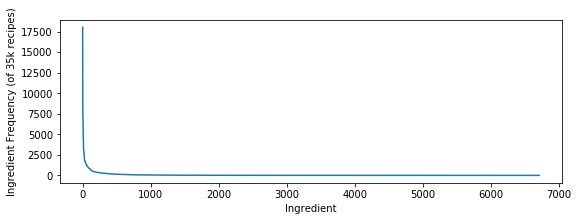

In [99]:
# Plot all ingredients and their frequency
plt.figure(1, figsize=(9,3))
plt.plot(bow_sum.values)
plt.ylabel('Ingredient Frequency (of 35k recipes)')
plt.xlabel('Ingredient')
plt.show()

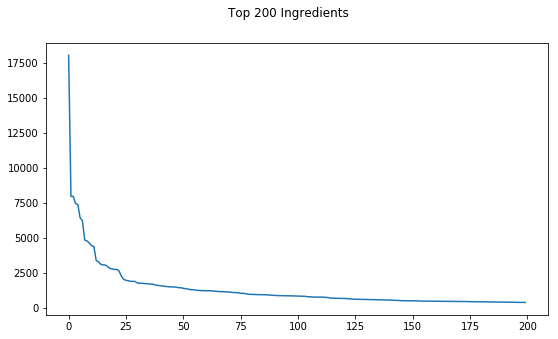

In [100]:
# Plot top X ingredients
n = 200
names = list(bow_sum.index)
plt.figure(1, figsize=(9, 5))
plt.plot(bow_sum[0:n].values)
plt.suptitle('Top ' + str(n) + ' Ingredients')
plt.show()

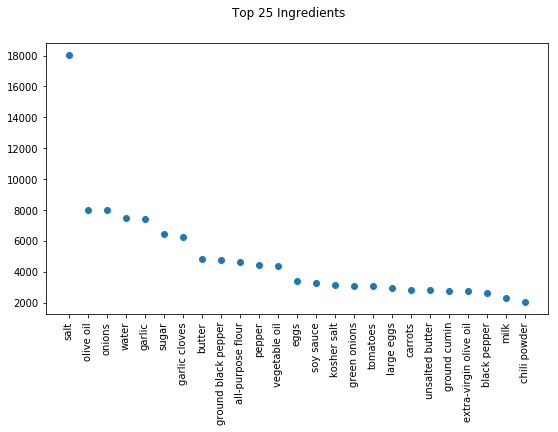

In [109]:
# Just for fun: Plot top 25 ingredients (Elbow method from k-means applied to this)
n = 25
names = list(bow_sum[0:25].index)
plt.figure(1, figsize=(9, 5))
plt.scatter(names,bow_sum[0:n].values)
plt.suptitle('Top ' + str(n) + ' Ingredients')
plt.xticks(rotation=90)
plt.show()

In [104]:
'''
Run BOW script again with ordered ingredients by freq file:
'''
names = list(bow_sum.index)
bow = createBow(df, 'ingredients', names, 'bow_sorted.csv',1)

['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']
Counter({'romaine lettuce': 1, 'black olives': 1, 'grape tomatoes': 1, 'garlic': 1, 'pepper': 1, 'purple onion': 1, 'seasoning': 1, 'garbanzo beans': 1, 'feta cheese crumbles': 1})
Last word freq: romaine lettuce 1
Done 0, 0.004754066467285156
['mint sprigs', 'sugar', 'green tea']
Counter({'mint sprigs': 1, 'sugar': 1, 'green tea': 1})
Last word freq: sugar 1
Done 5000, 10.120350122451782
['romano cheese', 'salt', 'reduced fat milk', 'walnut halves', 'linguine', 'ground black pepper', 'garlic cloves']
Counter({'romano cheese': 1, 'salt': 1, 'reduced fat milk': 1, 'walnut halves': 1, 'linguine': 1, 'ground black pepper': 1, 'garlic cloves': 1})
Last word freq: walnut halves 1
Done 10000, 20.359956979751587
['white wine', 'garlic cloves', 'crushed red pepper flakes', 'spaghetti', 'kosher salt', 'flat leaf parsley', 'cockles', 'extra-virgin olive

In [108]:
# Select the top 200 words for BOW, save .csv file
b = bow.iloc[:,0:200]
b.to_csv('bow.csv')